# Восстановление золота из руды

Перед нами стоит задача подготовки прототипа модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

**Технологический процесс**   
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку. 
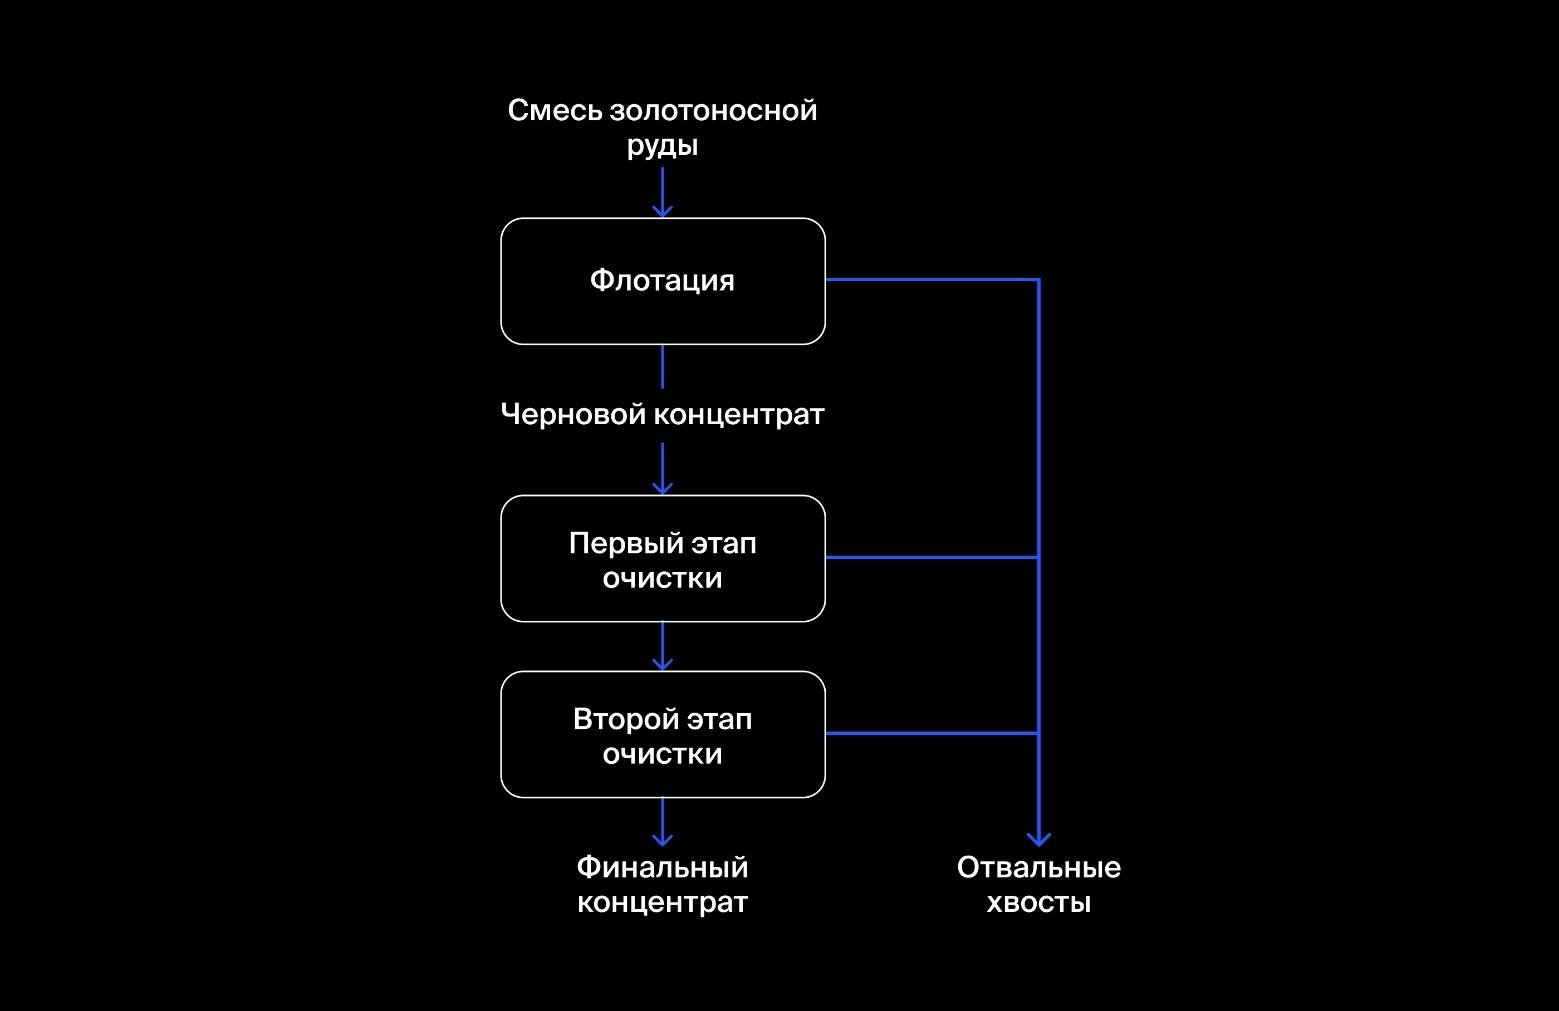

Опишем каждую стадию:    

**1. Флотация**   

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов. На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).    
**2. Очистка**   

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты. 

**Описание данных**  

*Технологический процесс*

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты:
    - Xanthate, Sulphate, Depressant o Xanthate — ксантогенат (промотер, или активатор флотации)
    - Sulphate — сульфат (на данном производстве сульфид натрия)
    - Depressant — депрессант (силикат натрия)
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

*Параметры этапов*

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:   
`[этап].[тип_параметра].[название_параметра]`   
Пример: `rougher.input.feed_ag`    

Возможные значения для блока `[этап]`:

- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики

**Исследование пройдёт в три основных этапа:**

1. Загрузка и подготовка данных.
2. Анализ данных
3. Обучение модели

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-расчёта-Recovery" data-toc-modified-id="Проверка-расчёта-Recovery-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчёта Recovery</a></span></li><li><span><a href="#Анализ-отсутсвующих-в-тестовой-выборке-признаков" data-toc-modified-id="Анализ-отсутсвующих-в-тестовой-выборке-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ отсутсвующих в тестовой выборке признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span><ul class="toc-item"><li><span><a href="#Концентрация-золота-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-золота-на-различных-этапах-очистки-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Концентрация золота на различных этапах очистки</a></span></li><li><span><a href="#Концентрация-серебра-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-серебра-на-различных-этапах-очистки-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Концентрация серебра на различных этапах очистки</a></span></li><li><span><a href="#Концентрация-свинца-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-свинца-на-различных-этапах-очистки-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Концентрация свинца на различных этапах очистки</a></span></li></ul></li><li><span><a href="#Распределене-размеров-гранул-сырья" data-toc-modified-id="Распределене-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределене размеров гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ" data-toc-modified-id="Исследование-суммарной-концентрации-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Итоговая-метрика" data-toc-modified-id="Итоговая-метрика-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Итоговая метрика</a></span></li><li><span><a href="#Очистка-от-выбросов" data-toc-modified-id="Очистка-от-выбросов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Очистка от выбросов</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Выбор-модели-и-проверка-на-тестовой-выборке" data-toc-modified-id="Выбор-модели-и-проверка-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбор модели и проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка и подготовка данных   

### Изучение данных   
Загрузим необходимые для нас библиотеки, модели и метрики.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pd.options.display.float_format = '{:,.3f}'.format
state = np.random.RandomState(42)

print('Setup complete')

Setup complete


Теперь загрузим данные.

In [4]:
try:
    full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except:
    full_df = pd.read_csv('datasets/gold_recovery_full_new.csv')
    train_df = pd.read_csv('datasets/gold_recovery_train_new.csv')
    test_df = pd.read_csv('datasets/gold_recovery_test_new.csv')

Изучим данные в каждом дасете.   
Начнём с полного датасета.

In [5]:
def get_info(df):
    display(df.head(), df.info(), df.describe())
    print('Процент пропусков:\n', (df.isna().mean()*100).sort_values(ascending=False).head(15))
    print()
    print('Кол-во дубликатов:', df.duplicated().sum())
    
get_info(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,...,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
1,2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,...,13.992,-505.503,11.951,-501.332,10.039,-500.170,7.985,-500.582,13.998,-599.787
2,2016-01-15 02:00:00,6.056,10.214,5.384,42.658,68.116,10.507,0.954,16.209,2.258,...,14.015,-502.521,11.913,-501.133,10.071,-500.129,8.014,-500.518,14.029,-601.427
3,2016-01-15 03:00:00,6.048,9.977,4.859,42.690,68.348,10.423,0.884,16.533,2.147,...,14.037,-500.857,12.000,-501.194,9.970,-499.202,7.977,-500.256,14.006,-599.996
4,2016-01-15 04:00:00,6.149,10.143,4.939,42.774,66.927,10.360,0.793,16.526,2.055,...,14.027,-499.839,11.953,-501.054,9.926,-501.687,7.894,-500.356,13.997,-601.497


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"19,438.000","19,438.000","19,228.000","19,439.000","19,439.000","19,438.000","19,338.000","19,433.000","19,439.000","19,415.000",...,"19,433.000","19,438.000","19,438.000","19,438.000","19,438.000","19,438.000","19,438.000","19,438.000","19,437.000","19,438.000"
mean,5.168,9.979,9.501,44.077,67.050,9.689,2.706,10.584,3.042,144.625,...,18.988,-485.895,15.010,-461.079,15.694,-488.684,12.198,-487.150,18.959,-505.436
std,1.372,1.669,2.788,5.130,10.126,2.329,0.949,2.869,0.923,44.464,...,5.411,47.759,4.890,67.406,5.511,34.533,5.333,38.347,5.550,37.689
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,...,0.000,-799.799,0.000,-800.837,-0.372,-797.324,0.528,-800.220,-0.079,-809.741
25%,4.251,9.137,7.723,43.402,63.300,8.063,2.040,8.939,2.461,114.107,...,14.976,-500.705,11.940,-500.188,10.989,-500.458,8.971,-500.129,14.983,-500.728
50%,5.066,10.102,9.219,45.011,68.173,9.744,2.749,10.622,2.985,143.232,...,18.017,-499.838,14.971,-499.460,15.000,-499.803,11.019,-499.935,19.961,-500.048
75%,5.896,11.036,10.948,46.275,72.687,11.134,3.333,12.104,3.571,175.076,...,23.012,-498.250,19.034,-400.118,18.026,-498.384,14.019,-499.437,24.003,-499.495
max,16.002,17.032,19.616,52.757,100.000,19.552,5.804,22.318,8.245,265.983,...,30.116,-245.239,31.270,-6.507,43.710,-244.484,27.926,-137.740,32.189,-104.427


Процент пропусков:
 secondary_cleaner.output.tail_sol          8.992
rougher.input.floatbank11_xanthate         2.330
rougher.state.floatbank10_e_air            2.243
primary_cleaner.output.concentrate_sol     1.903
secondary_cleaner.state.floatbank2_a_air   1.132
final.output.concentrate_sol               1.085
rougher.input.feed_size                    0.746
primary_cleaner.output.concentrate_pb      0.597
primary_cleaner.input.xanthate             0.535
final.output.tail_pb                       0.520
rougher.input.feed_pb                      0.514
rougher.input.feed_sol                     0.509
primary_cleaner.output.tail_sol            0.319
rougher.input.floatbank11_sulfate          0.226
primary_cleaner.input.depressant           0.190
dtype: float64

Кол-во дубликатов: 0


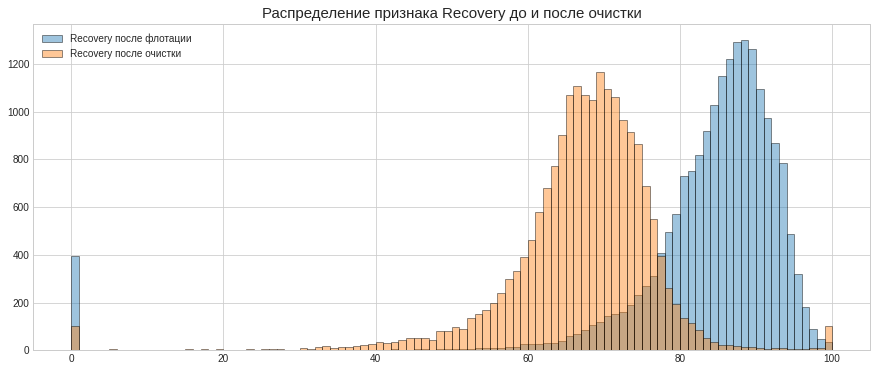

In [6]:
full_df['rougher.output.recovery'].hist(bins=100, figsize=(15,6), ec='black', alpha=.43)
full_df['final.output.recovery'].hist(bins=100, figsize=(15,6), ec='black', alpha=.43)
plt.title('Распределение признака Recovery до и после очистки', fontsize=15)
plt.legend(['Recovery после флотации', 'Recovery после очистки']);

Здесь мы видим что первый столбец это дата и время, но имеет другой тип данных. Мы преобразуем первый столбец в индекс. Целевыми признаками для нас являются `rougher.output.recovery` и `final.output.recovery`. Имеются нулевые значения почти во всех признаках, в целевых в том чилсе, возможно это выбросы. Имеются так же пропуски значений, больше всего в столбце `secondary_cleaner.output.tail_sol` - почти 9%. Дубликаты не обнаружены.   

Теперь посмотрим обучающую выборку.

In [7]:
get_info(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,...,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
1,2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,...,13.992,-505.503,11.951,-501.332,10.039,-500.170,7.985,-500.582,13.998,-599.787
2,2016-01-15 02:00:00,6.056,10.214,5.384,42.658,68.116,10.507,0.954,16.209,2.258,...,14.015,-502.521,11.913,-501.133,10.071,-500.129,8.014,-500.518,14.029,-601.427
3,2016-01-15 03:00:00,6.048,9.977,4.859,42.690,68.348,10.423,0.884,16.533,2.147,...,14.037,-500.857,12.000,-501.194,9.970,-499.202,7.977,-500.256,14.006,-599.996
4,2016-01-15 04:00:00,6.149,10.143,4.939,42.774,66.927,10.360,0.793,16.526,2.055,...,14.027,-499.839,11.953,-501.054,9.926,-501.687,7.894,-500.356,13.997,-601.497


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"14,148.000","14,148.000","13,938.000","14,149.000","14,149.000","14,149.000","14,049.000","14,144.000","14,149.000","14,129.000",...,"14,143.000","14,148.000","14,148.000","14,148.000","14,148.000","14,148.000","14,148.000","14,148.000","14,147.000","14,148.000"
mean,5.142,10.133,9.203,44.004,66.519,9.607,2.597,10.512,2.918,133.321,...,19.985,-478.697,15.487,-460.229,16.775,-483.956,13.065,-483.967,19.578,-506.798
std,1.370,1.655,2.791,4.905,10.295,2.319,0.972,3.004,0.904,39.432,...,5.658,50.736,5.256,58.844,5.832,37.893,5.766,39.208,5.764,37.079
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,...,0.000,-799.709,0.000,-799.889,-0.372,-797.142,0.646,-800.006,0.195,-809.399
25%,4.212,9.297,7.485,43.276,62.546,7.997,1.906,8.811,2.369,107.007,...,14.991,-500.629,11.895,-500.149,11.084,-500.363,8.994,-500.106,14.989,-500.745
50%,4.995,10.297,8.845,44.872,67.433,9.480,2.592,10.515,2.851,133.018,...,20.002,-499.681,14.976,-499.389,17.932,-499.702,11.998,-499.915,19.984,-500.061
75%,5.860,11.171,10.488,46.166,72.346,11.004,3.242,11.933,3.435,159.825,...,24.991,-477.472,20.059,-400.039,21.347,-487.712,17.983,-453.187,24.992,-499.536
max,16.002,17.032,18.125,52.757,100.000,19.552,5.640,22.318,8.197,250.128,...,30.116,-245.239,24.008,-145.071,43.710,-275.073,27.926,-157.396,32.189,-104.427


Процент пропусков:
 secondary_cleaner.output.tail_sol          11.344
rougher.state.floatbank10_e_air             3.081
rougher.input.floatbank11_xanthate          3.025
primary_cleaner.output.concentrate_sol      2.021
secondary_cleaner.state.floatbank2_a_air    1.534
final.output.concentrate_sol                1.491
rougher.input.feed_size                     1.018
primary_cleaner.input.xanthate              0.707
rougher.input.feed_pb                       0.707
final.output.tail_pb                        0.707
primary_cleaner.output.concentrate_pb       0.608
rougher.input.feed_sol                      0.551
primary_cleaner.output.tail_sol             0.325
rougher.input.floatbank11_sulfate           0.254
primary_cleaner.input.depressant            0.226
dtype: float64

Кол-во дубликатов: 0


Здесь картина почти такая же. Имеются нулевые значения почти во всех признаках, в целевых в том чилсе, возможно это не ошибка, а просто обогащение не дало результатов. Имеются так же пропуски значений, больше всего в столбце `secondary_cleaner.output.tail_sol` - 11.3%. Дубликаты не обнаружены.   
Изучим тестовую выборку.

In [8]:
get_info(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.801,14.993,8.080,1.005,"1,398.981",-500.226,"1,399.145",-499.920,"1,400.103",...,12.024,-497.796,8.017,-501.289,7.947,-432.318,4.873,-500.037,26.706,-499.709
1,2016-09-01 01:59:59,215.392,14.987,8.080,0.990,"1,398.778",-500.057,"1,398.055",-499.778,"1,396.151",...,12.058,-498.696,8.131,-499.634,7.958,-525.840,4.879,-500.162,25.020,-499.819
2,2016-09-01 02:59:59,215.260,12.885,7.787,0.996,"1,398.494",-500.868,"1,398.860",-499.765,"1,398.076",...,11.962,-498.767,8.097,-500.827,8.071,-500.802,4.905,-499.829,24.995,-500.623
3,2016-09-01 03:59:59,215.336,12.007,7.640,0.864,"1,399.618",-498.864,"1,397.440",-499.211,"1,400.129",...,12.033,-498.351,8.075,-499.474,7.897,-500.869,4.931,-499.964,24.949,-498.710
4,2016-09-01 04:59:59,199.099,10.683,7.530,0.806,"1,401.268",-500.808,"1,398.129",-499.505,"1,402.172",...,12.025,-500.786,8.055,-500.398,8.108,-509.527,4.958,-500.360,25.003,-500.856


None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"5,286.000","5,285.000","5,290.000","5,286.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000",...,"5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000"
mean,174.840,8.684,7.266,1.384,"1,539.494",-497.666,"1,545.174",-500.273,"1,527.272",-498.331,...,16.320,-505.145,13.735,-463.350,12.804,-501.329,9.881,-495.663,17.305,-501.793
std,43.027,3.072,0.610,0.643,116.798,19.952,122.225,32.968,122.538,21.965,...,3.494,31.427,3.430,86.189,3.027,17.951,2.868,34.535,4.537,39.044
min,2.566,0.004,5.650,0.005,0.000,-795.316,0.000,-799.997,0.000,-799.961,...,0.000,-799.799,0.000,-800.837,0.069,-797.324,0.528,-800.220,-0.079,-809.741
25%,147.121,6.490,6.890,0.908,"1,498.936",-500.357,"1,498.971",-500.703,"1,473.230",-501.018,...,14.036,-500.868,12.029,-500.323,10.915,-500.727,8.037,-500.195,13.997,-500.691
50%,177.828,8.052,7.250,1.198,"1,585.129",-499.969,"1,595.622",-500.029,"1,549.595",-500.018,...,17.008,-500.116,14.965,-499.577,12.954,-499.990,10.004,-499.991,16.015,-500.007
75%,208.125,10.028,7.600,1.798,"1,602.077",-499.569,"1,602.324",-499.293,"1,601.144",-498.994,...,18.039,-499.404,15.962,-400.934,15.098,-499.283,11.997,-499.720,21.020,-499.373
max,265.983,40.000,15.500,4.102,"2,103.104",-57.195,"1,813.084",-142.527,"1,715.054",-150.937,...,30.052,-401.565,31.270,-6.507,25.259,-244.484,14.087,-137.740,26.706,-123.307


Процент пропусков:
 rougher.input.floatbank11_xanthate           0.473
rougher.input.feed_sol                       0.397
secondary_cleaner.state.floatbank3_a_air     0.170
rougher.input.floatbank11_sulfate            0.151
primary_cleaner.input.depressant             0.095
rougher.input.floatbank10_sulfate            0.095
primary_cleaner.input.xanthate               0.076
primary_cleaner.input.sulfate                0.076
rougher.input.feed_rate                      0.057
secondary_cleaner.state.floatbank2_a_air     0.057
secondary_cleaner.state.floatbank2_b_air     0.038
rougher.input.feed_size                      0.019
secondary_cleaner.state.floatbank2_b_level   0.000
rougher.state.floatbank10_f_level            0.000
rougher.state.floatbank10_f_air              0.000
dtype: float64

Кол-во дубликатов: 0


Здесь мы уже видим немного другую картину. Процент пропусков значительно ниже двух предыдущих выборок, так же и нулевых значений. Но самое главное что по какой-то причине в тестовой выборке отсутсвуют чать столбцов в том числе с целевыми признаками.   

Так как выборки уже разделены на тестовую и обучающую, посмотрим правильно ли они разделены.

In [9]:
def print_info(df, features_train, features_valid):
    return print(' Количество образцов обучающей выборки:', len(features_train),'\n',
                 'Количество образцов тестовой выборки:', len(features_valid),'\n',
                 'Сумма выборок:', len(features_train) + len(features_valid),'\n',
                 'Количество образцов подготовленной выборки (контрольная сумма):', len(df))
print_info(full_df, train_df, test_df)
print()

print(f'Размер обучающей выборки составляет: {train_df.shape[0]  / len(full_df):.1%}')
print(f'Размер тестовой выборки составляет: {test_df.shape[0] / len(full_df):.1%}')

 Количество образцов обучающей выборки: 14149 
 Количество образцов тестовой выборки: 5290 
 Сумма выборок: 19439 
 Количество образцов подготовленной выборки (контрольная сумма): 19439

Размер обучающей выборки составляет: 72.8%
Размер тестовой выборки составляет: 27.2%


Тестовыя выборка должна быть не менне 20%, данные разделены корректно

### Проверка расчёта Recovery   

Здесь проверим правильность рассчёта признака `rougher.output.recovery` для обучающей выборки.   
*Эффективность обогащения рассчитывается по формуле:*   

$Recovery = \frac{C \times (F - T)}{F \times (C - T)} \times 100\%$

*Где:*
   - C — доля золота в концентрате после флотации/очистки;
   - F — доля золота в сырье/концентрате до флотации/очистки;
   - T — доля золота в отвальных хвостах после флотации/очистки.
   
Сравнивать будем метрикой МАЕ

Выделим целевой признак из обучающей выборки, котрый будем сравнивать

In [10]:
true_recovery = train_df['rougher.output.recovery']

Теперь рассчитаем эффективность самостоятельно.

In [11]:
calculated_recovery = (
    (train_df['rougher.output.concentrate_au'] * (train_df['rougher.input.feed_au'] - train_df['rougher.output.tail_au'])) / 
    (train_df['rougher.input.feed_au'] * (train_df['rougher.output.concentrate_au'] - train_df['rougher.output.tail_au'])) * 100)

Теперь посмотрим на показание средней абсолютной ошибки

In [12]:
print('Средняя абсолютная ошибка: {:.17f}'.format(mean_absolute_error(true_recovery, calculated_recovery)))

Средняя абсолютная ошибка: 0.00000000000000974


Ошибка стремится к нулю, принимаем что значения рассчитаны правильно

### Анализ отсутсвующих в тестовой выборке признаков    
Посмотрим на столбцы (признаки) котрые отсутвуют в тестовой выборке.

In [13]:
train_df.columns.drop(test_df.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [14]:
full_df.columns.str.contains('output').sum()

30

Как мы видим в тестовой выборке пропущены все 30 признаков получаемые на выходе каждого этапа и 4 рассчётных признака.
Считаю что данные признаки необходимо удалить из тренировочного набора, что бы модель не была проверяющей и предсказывала только по имеющимся в тестовой выборке признакам.

### Предобработка данных   

Проведём предобработку наших данных. Что нам следует сделать:

1. Столбец `date` сделать индексом
2. Добавить целевой признак в тестовую выборку
3. Обработать пропуски
4. Убрать лишние столбцы из обучающей выборки
5. Разбить данные для обучения модели процессов флотации и очистки

Приступим по порядку:

Заменим индекс

In [15]:
try:
    full_df.set_index('date', inplace=True)
    train_df.set_index('date', inplace=True)
    test_df.set_index('date', inplace=True)
except:
    None

Добавим целевой признак в тестовую выборку из общего датасета

In [16]:
try:
    test_df = test_df.join(full_df[['final.output.recovery', 'rougher.output.recovery']])
except:
    None

Удалим пропуски в датасетах, так как они могут повлиять на результат обучения модели.

In [17]:
# First decision was to replace NaN by ffill method, but results of cross validation were bad
#train_df.fillna(method='ffill', inplace=True)
#test_df.fillna(method='ffill', inplace=True)
#full_df.fillna(method='ffill', inplace=True)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
full_df.dropna(inplace=True)

Посмотрим на результат

In [18]:
print('Процент пропусков в обучающей выборке:\n', (train_df.isna().mean()*100).sort_values(ascending=False).head(3),'\n')
print('Процент пропусков в тестовой выборке:\n', (test_df.isna().mean()*100).sort_values(ascending=False).head(3))

Процент пропусков в обучающей выборке:
 final.output.concentrate_ag       0.000
rougher.state.floatbank10_b_air   0.000
rougher.state.floatbank10_f_air   0.000
dtype: float64 

Процент пропусков в тестовой выборке:
 primary_cleaner.input.sulfate              0.000
secondary_cleaner.state.floatbank3_b_air   0.000
rougher.state.floatbank10_d_level          0.000
dtype: float64


Уберем лишние столбцы из обучающей выборки

In [19]:
train_df.drop(list(train_df.columns.drop(test_df.columns)), axis=1, inplace=True)

Теперь разобьём наши данные.   
Посмотрим на столбцы.

In [20]:
test_df.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [21]:
# columns for first process
rough_columns = [col for col in train_df.columns if 'rougher' in col]
# columns for second process
final_columns = [col for col in train_df.columns if 'cleaner' in col]

Тепрерь можем разделить выборки

In [22]:
X_train_rough = train_df.loc[:, rough_columns].drop('rougher.output.recovery', axis=1)
Y_train_rough = train_df['rougher.output.recovery']
X_test_rough = test_df.loc[:, rough_columns].drop('rougher.output.recovery', axis=1)
Y_test_rough = test_df['rougher.output.recovery']

X_train_final = train_df.loc[:, final_columns]
Y_train_final = train_df['final.output.recovery']
X_test_final = test_df.loc[:, final_columns]
Y_test_final = test_df['final.output.recovery']

Предварительно предобработку сделали, потребуется ли дополнительная обработка посмотрим после анализа данных

## Анализ данных   
В данном шаге мы проанализируем следующее:

1. Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.
3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим как меняется концентрация металлов на следующих этапах очистки:
- В состоянии поставки
- После флотации (черновая стадия)
- После первичной очистки
- После второичной очистки (финальная стадия)

Напишем пару функций для построения графиков

In [23]:
def concentration(elem):
    cols = ['rougher.input.feed_'+elem, 'rougher.output.concentrate_'+elem, 
            'primary_cleaner.output.concentrate_'+elem, 'final.output.concentrate_'+elem]
    plt.figure(figsize=(15,8))
    
    for col in cols:
        sns.kdeplot(full_df[col], shade=True)
        
        plt.legend(['В состоянии поставки',
                    'После флотации (черновая стадия)',
                    'После первичной очистки',
                    'После второичной очистки (финальная стадия)'], fontsize=15)
        plt.title('Концентрация металла ' + str(elem).title() + ' на различных этапах очистки', fontsize=20)
        
def boxplot_conc(elem):
    cols = ['rougher.input.feed_'+elem, 'rougher.output.concentrate_'+elem, 
            'primary_cleaner.output.concentrate_'+elem, 'final.output.concentrate_'+elem]
    plt.figure(figsize=(15,8))
    sns.boxplot(data=full_df[cols], orient='v', linewidth=0.58, palette='Pastel2')
    plt.title('Концентрация металла ' + str(elem).title() + ' на различных этапах очистки', fontsize=20)

#### Концентрация золота на различных этапах очистки

Построим графики и сделаем выводы

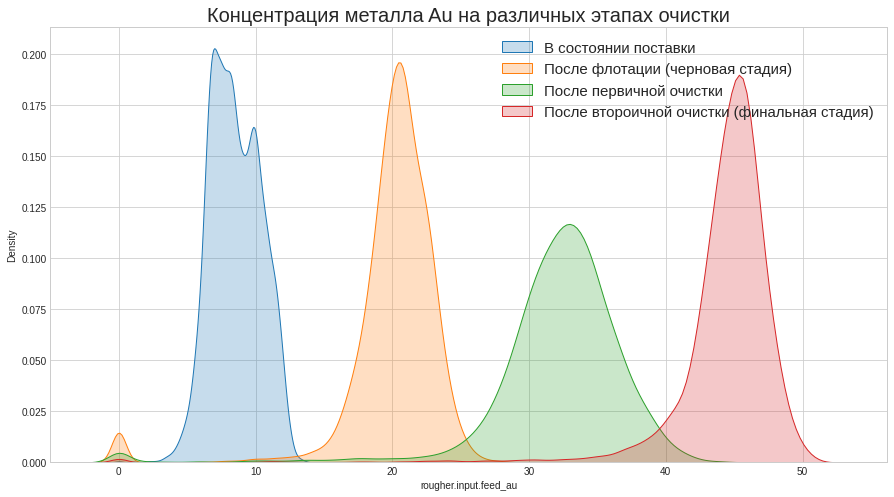

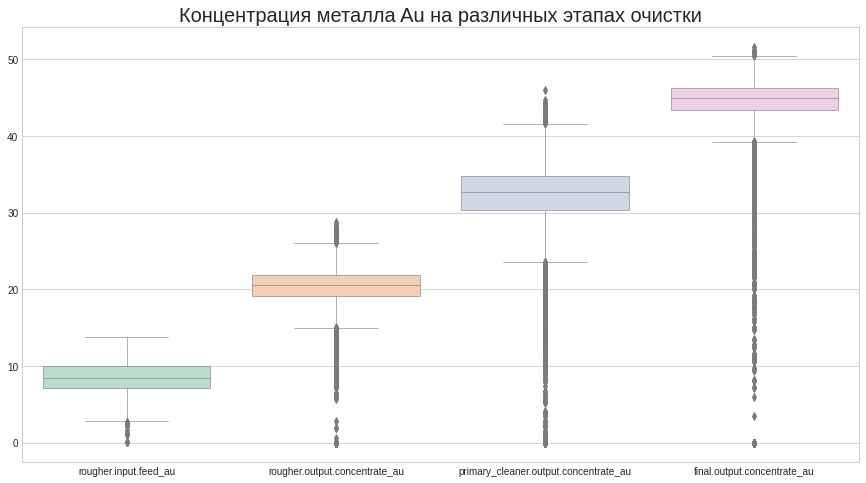

In [24]:
concentration('au')
boxplot_conc('au')

Здесь мы видим хорошую закономерность, что на каждом этапе очитски мы получаем большую концентрацию золота

#### Концентрация серебра на различных этапах очистки

Построим графики и сделаем выводы

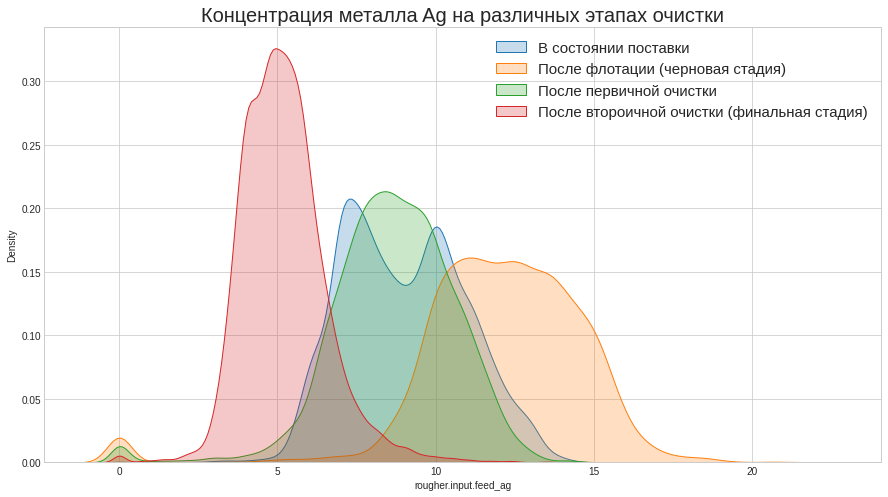

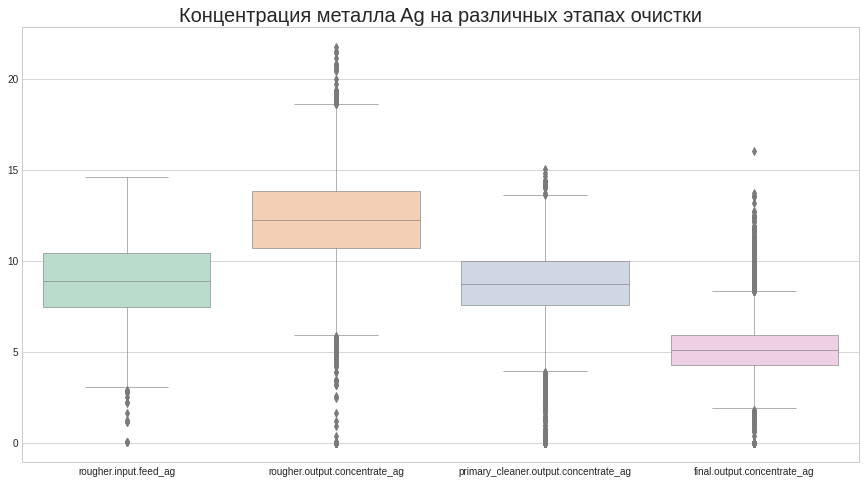

In [25]:
concentration('ag')
boxplot_conc('ag')

Здесь мы видим что концентрация серебра после флотации повышается, но начинает снижаться после очисток.

#### Концентрация свинца на различных этапах очистки

Построим графики и сделаем выводы

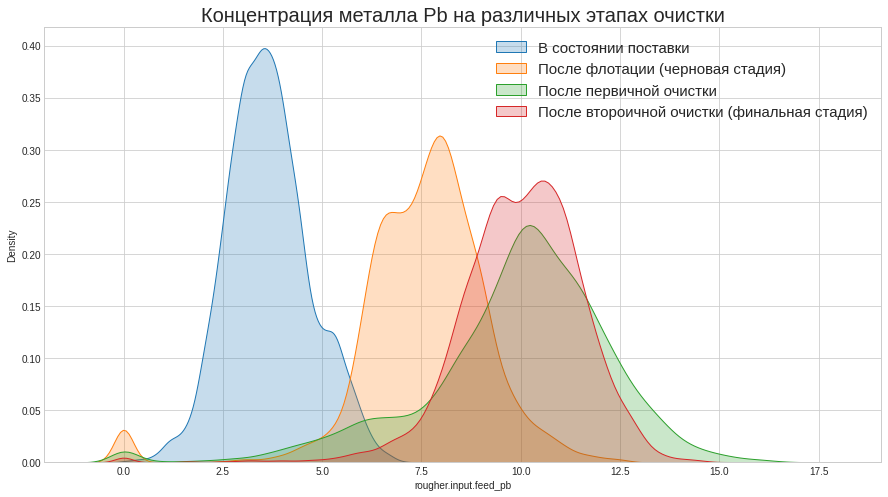

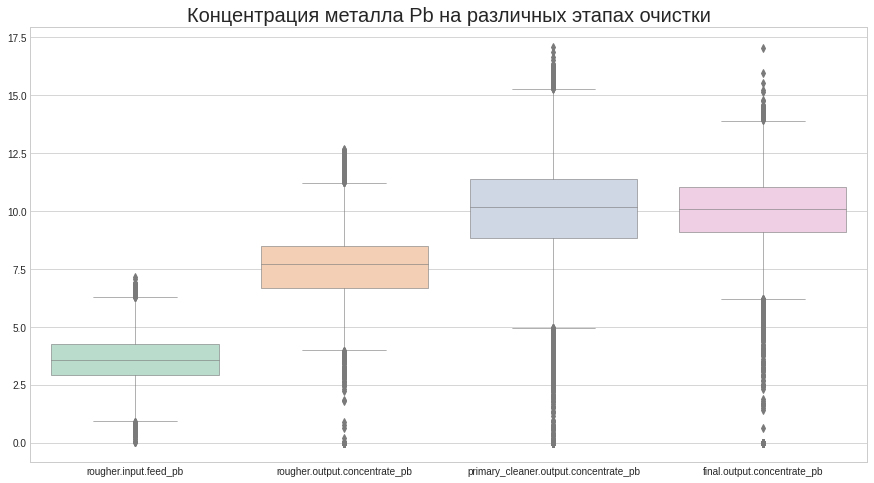

In [26]:
concentration('pb')
boxplot_conc('pb')

Со свинцом дела обстоят не самым лучшим образом. Концентрация свинца так же повышается на каждом этапе очистки, кроме последнего, там концентрация остаётся не изменной. Возможно это говорит о технологической сложности отдедления золота от примесей свинца.

**Вывод**

Здесь можно сказать что очистка явно даёт результаты, но с повышением концентрации золота повышается и концентрация свинца. Возможно отделить примеси свинца в золоте достаточно сложно и требуется подбор других реагентов. Так же стоит отметить наличе нулевых значений концентрации на каждом этапе очистки для каждого из исследуемых металлов, вероятнее всего это выбросы. Подумаем что будем с ними делать перед построением модели 

### Распределене размеров гранул сырья

Посмотрим на распределение размеров гранул сырья в обучающей и тестовой выборках

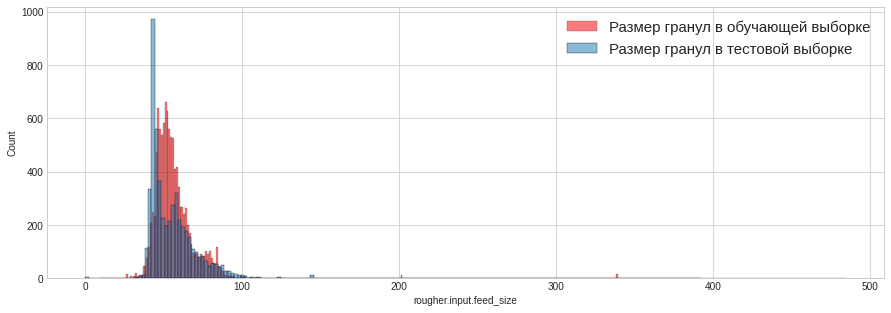

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(train_df['rougher.input.feed_size'], color='Red', alpha=0.52)
sns.histplot(test_df['rougher.input.feed_size'], alpha=0.52)
plt.legend(['Размер гранул в обучающей выборке', 'Размер гранул в тестовой выборке'], fontsize=15);

Разница в распределении видна уже сейчас, но большая часть тестовой выборки покрывается обучающей.   
Тем не менее посмотрим поближе.

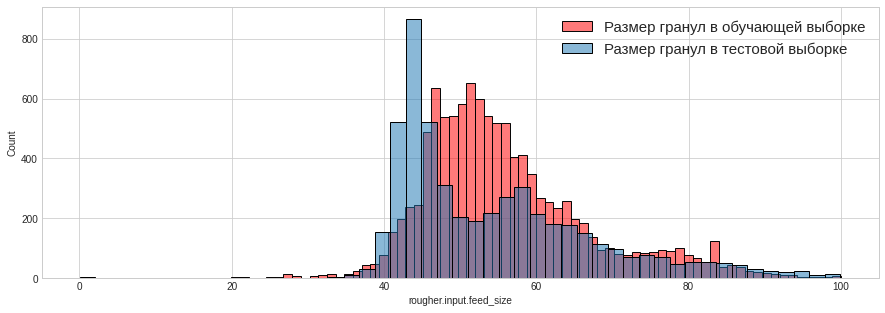

In [32]:
plt.figure(figsize=(15,5))
sns.histplot(train_df[train_df['rougher.input.feed_size'] < 100]['rougher.input.feed_size'], color='Red', alpha=0.52)
sns.histplot(test_df[test_df['rougher.input.feed_size'] < 100]['rougher.input.feed_size'], alpha=0.52)
plt.legend(['Размер гранул в обучающей выборке', 'Размер гранул в тестовой выборке'], fontsize=15);

Всё как и предполагалось, разница есть, но основную чать мы покрываем.

### Исследование суммарной концентрации веществ   
В данном шаге мы исследуем суммарную концентрацию веществ на различных стадиях:

- В сырье в состоянии поставки
- В черновом концентрате
- В финальном концентрате

Посчитаем концентрацию на каждой стадии

In [27]:
input_feed = (full_df['rougher.input.feed_au'] + 
              full_df['rougher.input.feed_ag'] + 
              full_df['rougher.input.feed_pb'] + 
              full_df['rougher.input.feed_sol']
             )
rougher_output = (full_df['rougher.output.concentrate_au'] + 
              full_df['rougher.output.concentrate_ag'] + 
              full_df['rougher.output.concentrate_pb'] + 
              full_df['rougher.output.concentrate_sol']
             )
final_output = (full_df['final.output.concentrate_au'] + 
              full_df['final.output.concentrate_ag'] + 
              full_df['final.output.concentrate_pb'] + 
              full_df['final.output.concentrate_sol']
             )

summary_concentration = pd.DataFrame({
    'input_feed': input_feed,
    'rougher_output': rougher_output,
    'final_output': final_output})

summary_concentration.describe().T

,count,mean,std,min,25%,50%,75%,max
input_feed,"16,094.000",58.102,6.761,0.040,54.364,58.227,62.578,76.979
rougher_output,"16,094.000",68.806,12.095,0.000,66.643,70.701,74.763,87.273
final_output,"16,094.000",69.368,6.038,0.000,68.373,69.943,71.669,80.211


Уже сейчас мы видим что общая концентрация металлов вырастает после флотации и незначительно уменьшается после двухэтапной очистки. Построим графики.

Посмотрим на распределение концентрации для каждого этапа очистки

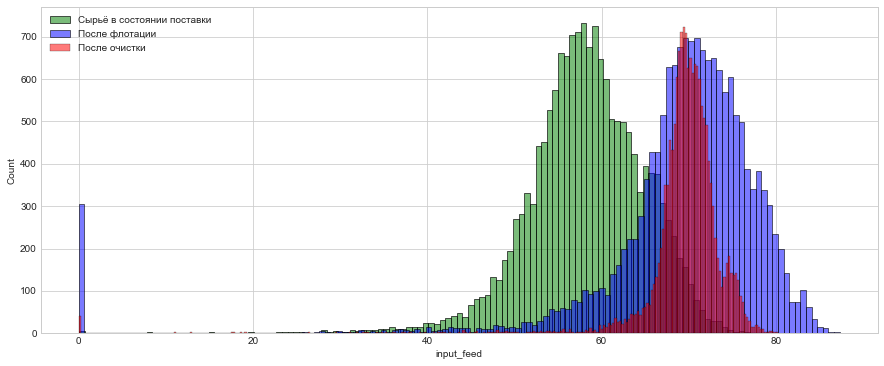

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(summary_concentration['input_feed'], color='Green', alpha=0.52)
sns.histplot(summary_concentration['rougher_output'], color='Blue', alpha=0.52)
sns.histplot(summary_concentration['final_output'], color='Red', alpha=0.52)
plt.legend(['Cырьё в состоянии поставки', 'После флотации', 'После очистки']);

Снова здесь видим выбросы в виде нулевых значений, в особенности для концентрации после флотации.

## Обучение модели

Мы почти готовы к обучению модели. Выполним следующие шаги:

1. Напишем функцию для вычисления итоговой sMAPE.
2. Очитска датасетов от выбросов.
3. Обучим разные модели и оценим их качество кросс-валидацией. 
4. Выберем лучшую модель и проверим её на тестовой выборке.

### Итоговая метрика

Небходимая нам метрика рассчитывается по формуле.   

$sMAPE = \frac{1}{N} \sum\limits _{i = 1}^{N} \frac{|y_i - \hat{y}_i|}{|y_i| + |\hat{y}_i| \div 2} \times 100\%$

Финальное значение sMAPE раасчитывается по следующей формуле:

**Финальное** $sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$

Создадим нашу метрику

In [29]:
def sMAPE(true, pred):
    '''The function returns sMAPE'''
    error = np.mean(abs(true - pred) / ((abs(true) + abs(pred)) / 2) )*100
    return error

def final_sMAPE(rough, final):
    '''The function returns counted final sMAPE'''
    final_sMAPE = .25 * rough + .75 * final
    return final_sMAPE

mape_score = make_scorer(sMAPE, greater_is_better=False)

### Очистка от выбросов   
Как мы выяснили при анализе данных у нас имеются нулевые значения концентрации металлов на разных этапах очистки, которые выглядят выбросами.   
Посмотрим на долю этих выбросов в общих данных.

In [30]:
print('Процент данных с нулевым значеним концентрации', full_df
      .query('@input_feed == 0 | @rougher_output == 0 | @final_output == 0').shape[0] / full_df.shape[0] * 100)

Процент данных с нулевым значеним концентрации 2.118802038026594


Процент не большой и скорее всего не повлияет на обучение нашей модели.

### Обучение моделей

Для обучения мы подготовили несколько выборок, вспомни их:  
- *Для процесса флотации*: `X_train_rough`, `Y_train_rough`, `X_test_rough`, `Y_test_rough`   
- *Для процесса очистки*: `X_train_final`, `Y_train_final`, `X_test_final`, `Y_test_final`

Для автоматизации процесса используем `Pipeline`.

In [31]:
model_lr = make_pipeline(StandardScaler(), LinearRegression(n_jobs=-1))
model_dt = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=34))
model_rf = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=34))

Переберать параметры будем через `GridSearchCV`. Посмотрим какие параметры можно использовать для каждой модели

In [32]:
model_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [33]:
model_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'decisiontreeregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_impurity_split', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

In [34]:
model_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

Выбрем параметры.

In [35]:
lr_param = {'linearregression__normalize': [True, False],
           'linearregression__copy_X': [True, False],
           'linearregression__fit_intercept': [True, False]}
dt_param = {'decisiontreeregressor__max_depth': range(1, 20),
           'decisiontreeregressor__splitter': ['best', 'random'],
           'decisiontreeregressor__min_samples_leaf': range(1, 3)}
rf_param = {'randomforestregressor__max_depth': range(1, 25),
           'randomforestregressor__n_estimators': range(1, 131, 10)}

# Totally we have 6 models

rough_grid_lr = GridSearchCV(model_lr, lr_param, scoring=mape_score, n_jobs=-1)
final_grid_lr = GridSearchCV(model_lr, lr_param, scoring=mape_score, n_jobs=-1)

rough_grid_dt = GridSearchCV(model_dt, dt_param, scoring=mape_score, n_jobs=-1)
final_grid_dt = GridSearchCV(model_dt, dt_param, scoring=mape_score, n_jobs=-1)

rough_grid_rf = GridSearchCV(model_rf, rf_param, scoring=mape_score, n_jobs=-1)
final_grid_rf = GridSearchCV(model_rf, rf_param, scoring=mape_score, n_jobs=-1)

Теперь обучим модели

Напишем функцию, которая на входе возьмёт наши выборки, подберёт лучшие параметры шести моделей, оценит качество моделей кросс-валидацией и запишет все результаты в таблицу.

In [36]:
%%time
def results_table(X_train_rough, Y_train_rough, X_train_final, Y_train_final):
    
    # Train models for rough process
    rough_grid_lr.fit(X_train_rough, Y_train_rough)
    rough_grid_dt.fit(X_train_rough, Y_train_rough)
    rough_grid_rf.fit(X_train_rough, Y_train_rough)
    # Train models for clean process
    final_grid_lr.fit(X_train_final, Y_train_final)
    final_grid_dt.fit(X_train_final, Y_train_final)
    final_grid_rf.fit(X_train_final, Y_train_final)
    
    results = pd.DataFrame([{'model name': final_grid_lr.best_estimator_[1].__class__.__name__, 
                              'cross_val_score_rougher': rough_grid_lr.best_score_, 
                              'cross_val_score_final': final_grid_lr.best_score_,
                            'final_sMAPE': final_sMAPE(rough_grid_lr.best_score_, final_grid_lr.best_score_),
                        'best_rough_params': rough_grid_lr.best_estimator_,
                        'best_final_params': final_grid_lr.best_estimator_},
                        
                           {'model name': final_grid_dt.best_estimator_[1].__class__.__name__, 
                              'cross_val_score_rougher': rough_grid_dt.best_score_, 
                              'cross_val_score_final': final_grid_dt.best_score_,
                            'final_sMAPE': final_sMAPE(rough_grid_dt.best_score_, final_grid_dt.best_score_),
                        'best_rough_params': rough_grid_dt.best_estimator_,
                        'best_final_params': final_grid_dt.best_estimator_},
                        
                           {'model name': final_grid_rf.best_estimator_[1].__class__.__name__, 
                              'cross_val_score_rougher': rough_grid_rf.best_score_, 
                              'cross_val_score_final': final_grid_rf.best_score_,
                            'final_sMAPE': final_sMAPE(rough_grid_rf.best_score_, final_grid_rf.best_score_),
                        'best_rough_params': rough_grid_rf.best_estimator_,
                        'best_final_params': final_grid_rf.best_estimator_}])
    
    
    return results
    
results = results_table(X_train_rough, Y_train_rough, X_train_final, Y_train_final)
results

Wall time: 42min 28s


,model name,cross_val_score_rougher,cross_val_score_final,final_sMAPE,best_rough_params,best_final_params
0,LinearRegression,-9.804,-9.353,-9.466,"(StandardScaler(), LinearRegression(n_jobs=-1,...","(StandardScaler(), LinearRegression(n_jobs=-1,..."
1,DecisionTreeRegressor,-10.313,-9.655,-9.819,"(StandardScaler(), DecisionTreeRegressor(max_d...","(StandardScaler(), DecisionTreeRegressor(max_d..."
2,RandomForestRegressor,-10.005,-9.409,-9.558,"(StandardScaler(), (DecisionTreeRegressor(max_...","(StandardScaler(), (DecisionTreeRegressor(max_..."


### Выбор модели и проверка на тестовой выборке

Самый лучший результат у нас показала модель Линейной регрессии. Посмотрим её параметры.

In [42]:
print ('Параметры для модели предсказания коэф. после флотации:\n', results['best_rough_params'][0], '\n')
print ('Параметры для модели предсказания коэф. после очистки:\n', results['best_final_params'][0], '\n')

Параметры для модели предсказания коэф. после флотации:
 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression',
                 LinearRegression(n_jobs=-1, normalize=True))]) 

Параметры для модели предсказания коэф. после очистки:
 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression',
                 LinearRegression(n_jobs=-1, normalize=True))]) 



Проверим качество нашей модели на тестовой выборке.

In [38]:
rough_pred = rough_grid_lr.predict(X_test_rough)
final_pred = final_grid_lr.predict(X_test_final)

print ('sMAPE для этапа флотации:', sMAPE(Y_test_rough, rough_pred))
print ('sMAPE длы этапа очистки:', sMAPE(Y_test_final, final_pred))
print ('Финальное sMAPE:', final_sMAPE((sMAPE(Y_test_rough, rough_pred)), (sMAPE(Y_test_final, final_pred))))

sMAPE для этапа флотации: 9.318011033817875
sMAPE длы этапа очистки: 9.265277901846005
Финальное sMAPE: 9.278461184838973


Теперь сравним результат нашей модели с константной моделью со средним значением.

In [39]:
print ('sMAPE для этапа флотации:', sMAPE(Y_test_rough, Y_train_rough.mean()))
print ('sMAPE длы этапа очистки:', sMAPE(Y_test_final, Y_train_final.mean()))
print ('Финальное sMAPE:', final_sMAPE((sMAPE(Y_test_rough, Y_train_rough.mean())), (sMAPE(Y_test_final, Y_train_final.mean()))))

sMAPE для этапа флотации: 10.24137834175796
sMAPE длы этапа очистки: 9.568583573600394
Финальное sMAPE: 9.736782265639786


## Общий вывод

Мы изучили данные и выявили несколько моментов, которые мешают сделать модель более точной:
- Пропущенные значения, котрые мы в итоге удалили.
- Нулевые значения в показателях концентрации металлов и величины гранул

Лучшие результаты показала модель Линейной регрессии с параметром `normalize=True`:

sMAPE для этапа флотации: 9.31%   
sMAPE длы этапа очистки: 9.26%   
Финальное sMAPE: 9.27%   

**Стоит отметить что данная модель лучше константной всего на 0.46%.**